In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import functions
from sklearn.metrics import roc_curve, auc

In [3]:
#make folder for figs and data
def make_folder(names):
    '''makes folder for results and figs.
    names = list of folder names
    '''
    for _ in names:
        try:
            os.makedirs(os.path.join(os.getcwd(),_,''))
        except FileExistsError:
            pass

make_folder(['figs', 'results'])

In [2]:
def gc_cont_part(sq, \
           utr='GGGGAATTGTGAGCGGATAACAATTCCCCTCTAGAAATAATTTTGTTTAACTTTAAGAAGGAGATATACAT', region=(-30,30)):
    '''G+C content
    '''
    seq = utr[region[0]:] + sq[:region[1]]
    g_count = seq.count('G')
    c_count = seq.count('C')
    gc_cont = (g_count + c_count)/len(seq) * 100
    return gc_cont

In [5]:
all_features = pd.read_csv('results/features_and_merged_with_ixnos_dicodone.csv')

In [6]:
all_features['GC (%) (-30:30)'] = all_features['Sequence'].apply(lambda x:gc_cont_part(sq=x, region=(-30,30)))
all_features['GC (%) (-24:24)'] = all_features['Sequence'].apply(lambda x:gc_cont_part(sq=x, region=(-24,24)))
all_features['GC (%) (0:30)'] = all_features['Sequence'].apply(lambda x:gc_cont_part(sq=x, region=(0,30)))

<Figure size 432x288 with 0 Axes>

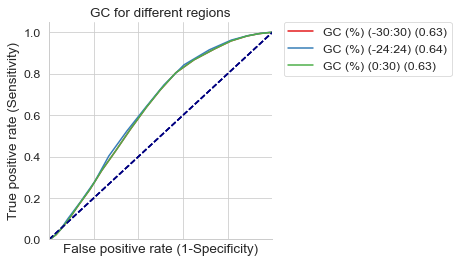

In [7]:
df = all_features[['GC (%) (-30:30)', 'GC (%) (-24:24)', 'GC (%) (0:30)', ]].copy()


df = -df


labels = all_features.Label.values
plt.figure(0).clf()
lw = 1.5

fig = plt.figure(figsize=(4, 4))


sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.4)
sns.set_palette("Set1")

for i, col in enumerate(df.columns):
    preds = df[col].values
    fpr, tpr, _ = roc_curve(labels, preds)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, # c=np.random.rand(3,),
             lw=lw, label=col +' (%0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('GC for different regions')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off


# Make common axis labels
# fig.text(0.5, 0.04, 'False positive rate (1-Specificity)', va='center', ha='center')
# fig.text(-0.08, 0.5, 'True positive rate (Sensitivity)', va='center', ha='center', rotation='vertical')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
sns.despine()
plt.savefig("figs/GC_different_regions.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()


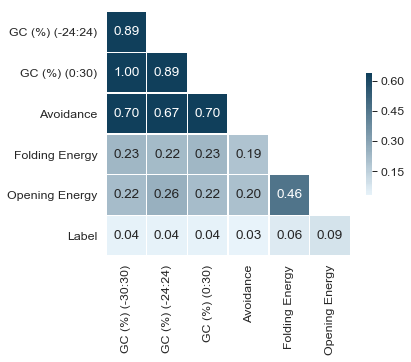

In [15]:
df_1 = all_features[['GC (%) (-30:30)', 'GC (%) (-24:24)', 'GC (%) (0:30)',  'Avoidance(Min_dg_int)',\
                  'STR(-30:30)','Accessibility', 'Label']].copy()
df_1.rename(columns={'STR(-30:30)': 'Folding Energy', 'Accessibility': 'Opening Energy',\
                  'Avoidance(Min_dg_int)':'Avoidance'}, inplace=True)



# Compute the correlation matrix
corr = df_1.corr(method='spearman')

#squared correlation
corr_sq = corr*corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_sq, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5.5,4.5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 240, s=90, l=25,as_cmap=True)
#cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
#cmap = sns.cubehelix_palette(50, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_sq, mask=mask, cmap=cmap, vmax=.64, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
ax.set_xlim(0,6)
ax.set_ylim(7,1)
plt.savefig("figs/Correlation_heatmap_for_GC_differnet_regions.pdf", bbox_inches = 'tight', pad_inches=0)